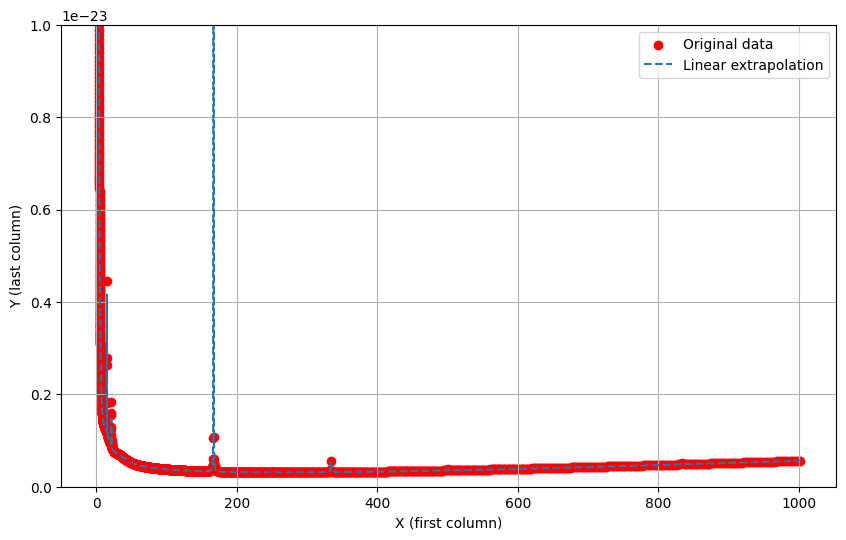

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Read the txt file
data = np.loadtxt('18213_ET10kmcolumns.txt')

# Extract first and last columns
x = data[5:2251, 0]
y = np.sqrt(data[5:2251, -1])

# Create interpolation function (extrapolation enabled)
f = interp1d(x, y, kind='linear', fill_value='extrapolate')


# Test the extrapolation
x_new = np.linspace(x.min() - 1, x.max() + 1, 4097)
y_interp = f(x_new)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original data', color='red')
plt.plot(x_new, y_interp, label='Linear extrapolation', linestyle='--')
plt.legend()
plt.xlabel('X (first column)')
plt.ylabel('Y (last column)')
plt.grid(True)

plt.ylim(0, 1e-23) 

plt.show()

asd=y_interp

In [38]:
asd_np =asd
gps_times_np = 1.126e+9
detector = "H1"

In [39]:
import numpy as np

if asd_np.ndim == 1:
    asd_np = asd_np[None, :]

if np.isscalar(gps_times_np):
    gps_times_np = np.array([gps_times_np], dtype=float)

In [47]:
import h5py
import numpy as np
from dingo.core.utils.misc import get_version

detector = "H1"

settings = {
    "domain_dict": {
        "type": "FrequencyDomain",
        "delta_f": 0.5,
        "f_min": 6.0,
        "f_max": 512.0,
    }
}


with h5py.File("asds_ET.hdf5", "w") as f:

    asds_grp = f.create_group("asds")
    gps_grp  = f.create_group("gps_times")

    asds_grp.create_dataset(detector, data=asd_np)
    gps_grp.create_dataset(detector, data=gps_times_np)

    f.create_dataset("version", data=f"dingo={get_version()}")

    # THIS IS THE MISSING PIECE
    f.attrs["settings"] = str(settings)
